In [81]:
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='iremoze', api_key='pRAt4yKgtusULCVgagiv')

from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [82]:
df = pd.read_excel('Comapany1(DF).xlsx')

In [83]:
df['new_time'] = [d.time() for d in df['Date/time occurrence']]
df['new_date'] = [d.date() for d in df['Date/time occurrence']]

df.sort_values(by = 'Date/time occurrence')

,Date/time occurrence,End devices,Malicious code,Respnse,Type of malware,Details,new_time,new_date
0,2017-01-02 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,2017-01-02
1,2017-01-03 07:57:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:57:00,2017-01-03
2,2017-01-03 08:02:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:02:00,2017-01-03
3,2017-01-03 10:16:00,2f,Defo.A,none,virus,MBR (0x80),10:16:00,2017-01-03
4,2017-01-03 16:30:00,2f,Defo.A,none,virus,MBR (0x80),16:30:00,2017-01-03
5,2017-01-04 08:29:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:29:00,2017-01-04
6,2017-01-05 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,2017-01-05
7,2017-01-06 07:56:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:56:00,2017-01-06
8,2017-01-07 08:03:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:03:00,2017-01-07
9,2017-01-09 08:06:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:06:00,2017-01-09


In [84]:
df["new_date"] = df["new_date"].map(lambda x: x.strftime("%Y%m%d"))


In [85]:
df.sort_values(by = 'Date/time occurrence')

,Date/time occurrence,End devices,Malicious code,Respnse,Type of malware,Details,new_time,new_date
0,2017-01-02 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,20170102
1,2017-01-03 07:57:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:57:00,20170103
2,2017-01-03 08:02:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:02:00,20170103
3,2017-01-03 10:16:00,2f,Defo.A,none,virus,MBR (0x80),10:16:00,20170103
4,2017-01-03 16:30:00,2f,Defo.A,none,virus,MBR (0x80),16:30:00,20170103
5,2017-01-04 08:29:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:29:00,20170104
6,2017-01-05 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,20170105
7,2017-01-06 07:56:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:56:00,20170106
8,2017-01-07 08:03:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:03:00,20170107
9,2017-01-09 08:06:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:06:00,20170109


In [86]:
df['freq'] = df.groupby('new_date')['new_date'].transform('count')


In [87]:
#df.freq = pd.to_numeric(df.freq, errors='coerce')
#df.new_date = pd.to_numeric(df.new_date, errors='coerce')


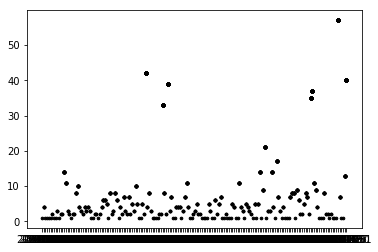

In [88]:
f2 = df['freq'].values
f1 = df['new_date'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2, c='black', s=7)

In [102]:
new = df[['freq', 'new_date']].copy()
a1 = new['freq'].values
a2 = new['new_date'].values
X2 = np.array(list(zip(a1,a2)))
a1

array([ 1,  4,  4,  4,  4,  1,  1,  1,  1,  2,  2,  1,  1,  3,  3,  3,  1,
        2,  2,  2,  2, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  3,  3,  3,  2,  2,
        1,  2,  2,  2,  2,  8,  8,  8,  8,  8,  8,  8,  8, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10,  4,  4,  4,  4,  4,  4,  3,  3,  3,  2,  4,
        4,  4,  3,  4,  3,  3,  3,  3,  4,  2,  3,  4,  1,  1,  2,  2,  2,
        2,  1,  2,  2,  4,  4,  4,  4,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  5,  5,  5,  5,  5,  1,  8,  8,  8,  8,  8,  8,  8,  8,
        2,  2,  3,  3,  3,  8,  8,  8,  8,  8,  8,  8,  8,  6,  6,  6,  6,
        6,  6,  1,  4,  4,  4,  4,  2,  2,  7,  7,  7,  7,  7,  7,  7,  3,
        3,  3,  2,  2,  7,  7,  7,  7,  7,  7,  7,  2,  2,  5,  5,  5,  5,
        5,  3,  3,  3, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  5,  5,  5,
        5,  5,  1,  1,  5,  5,  5,  5,  5,  2,  2, 42, 42, 42, 42, 42, 42,
       42, 42, 42, 42, 42

In [99]:
def MyDBSCAN(D, eps, MinPts):
    """
     a threshold distance eps`, 
     a required number of points `MinPts`.
    
    It will return a list of cluster labels. The label -1 means noise, and then
    the clusters are numbered starting from 1.
    """
    # There are two reserved values:
    #    -1 - Indicates a noise point
    #     0 - Means the point hasn't been considered yet.
    # Initially all labels are 0.    
    labels = [0]*len(D)

    # C is the ID of the current cluster.    
    C = 0
 
    for P in range(0, len(D)):

        if not (labels[P] == 0):
            continue
        
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number is below MinPts, this point is noise. 
        # This is the only condition under which a point is labeled 
        # NOISE--when it's not a valid seed point. A NOISE point may later 
        # be picked up by another cluster as a boundary point (this is the only
        # condition under which a cluster label can change--from NOISE to something else).
        if len(NeighborPts) < MinPts:
            labels[P] = -1
        # Otherwise, if there are at least MinPts nearby, use this point as the 
        # seed for a new cluster.    
        else:
            C += 1
           # Get the next cluster label.C += 1
           
           # Assing the label to our seed point.
            labels[P] = C
           
           # Grow the cluster from the seed point.
            growCluster(D, labels, P, C, eps, MinPts)
    
    # All data has been clustered!
    return labels


def growCluster(D, labels, P, C, eps, MinPts):
    """
    Grow a new cluster with label `C` from the seed point `P`.
    
    This function searches through the dataset to find all points that belong
    to this new cluster. When this function returns, cluster `C` is complete.
    
    Parameters:
      `D`      - The dataset (a list of vectors)
      `labels` - List storing the cluster labels for all dataset points
      `P`      - Index of the seed point for this new cluster
      `C`      - The label for this new cluster.  
      `eps`    - Threshold distance
      `MinPts` - Minimum required number of neighbors
    """

    # SearchQueue is a FIFO queue of points to evaluate. It will only ever 
    # contain points which belong to cluster C (and have already been labeled as such).
    #
    # The points are represented by their index values (not the actual vector).
    #
    # The FIFO queue behavior is accomplished by appending new points to the
    # end of the list, and using a while-loop rather than a for-loop.
    SearchQueue = [P]

    # For each point in the queue:
    #   1. Determine whether it is a branch or a leaf
    #   2. For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(SearchQueue):    
        
        # Get the next point from the queue.        
        P = SearchQueue[i]

        # Find all the neighbors of P
        NeighborPts = regionQuery(D, P, eps)
        
        # If the number of neighbors is below the minimum, then this is a leaf
        # point and we move to the next point in the queue.
        if len(NeighborPts) < MinPts:
            i += 1
            continue
        
        # Otherwise, we have the minimum number of neighbors, and this is a 
        # branch point.
            
        # For each of the neighbors...
        for Pn in NeighborPts:
           
            # If Pn was labelled NOISE during the seed search, then we
            # know it's not a branch point (it doesn't have enough 
            # neighbors), so make it a leaf point of cluster C and move on.
            if labels[Pn] == -1:
                labels[Pn] = C
            # Otherwise, if Pn isn't already claimed, claim it as part of
            # C and add it to the search queue.   
            elif labels[Pn] == 0:
                # Add Pn to cluster C.
                labels[Pn] = C
                
                # Add Pn to the SearchQueue.
                SearchQueue.append(Pn)
            
        # Advance to the next point in the FIFO queue.
        i += 1        
    
    # We've finished growing cluster C!


def regionQuery(D, P, eps):
    """
    Find all points in dataset `D` within distance `eps` of point `P`.
    
    This function calculates the distance between a point P and every other 
    point in the dataset, and then returns only those points which are within a
    threshold distance `eps`.
    """
    neighbors = []
    
    for Pn in range(0, len(D)):

        # If the distance is below the threshold, add it to the neighbors list.
        if (np.sqrt((a1[P] - a1[Pn]) ** 2 + (a2[P] - a2[Pn]) ** 2)) < eps:
            neighbors.append(Pn)

            
    return neighbors

In [101]:
k = MyDBSCAN( new , 30 ,2 )

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [39]:
df['k'] = k
df.head(5)

,Date/time occurrence,End devices,Malicious code,Respnse,Type of malware,Details,new_time,new_date,freq,k
0,2017-01-02 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,20170102,1,1
1,2017-01-03 07:57:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:57:00,20170103,4,1
2,2017-01-03 08:02:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:02:00,20170103,4,1
3,2017-01-03 10:16:00,2f,Defo.A,none,virus,MBR (0x80),10:16:00,20170103,4,1
4,2017-01-03 16:30:00,2f,Defo.A,none,virus,MBR (0x80),16:30:00,20170103,4,1


NameError: name 'c1' is not defined

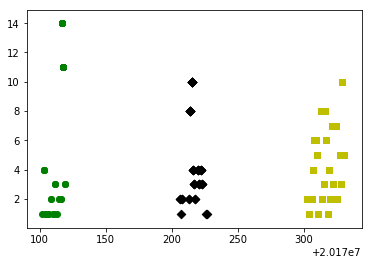

In [42]:
for i in range(0, len(df)):
    if df['k'][i] == 0:
         c1 = plt.scatter(df['new_date'][i],df['freq'][i],c='r',marker='+')
    elif df['k'][i] == 1:
         c2 = plt.scatter(df['new_date'][i],df['freq'][i],c='g',marker='o')
    elif df['k'][i] == -1:
         c3 = plt.scatter(df['new_date'][i],df['freq'][i],c='b',marker='*')
    elif df['k'][i] == 2:
         c4 = plt.scatter(df['new_date'][i],df['freq'][i],c='k',marker='D')
    elif df['k'][i] == 3:
         c5 = plt.scatter(df['new_date'][i],df['freq'][i],c='y',marker='s')
            
            
plt.legend([c1, c2, c3,c4,c5], ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()